# Basic Import 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (18,9)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CSV file /new-used-cars-dataset.csv")

In [4]:
df

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,$501 price drop,"$27,995"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,$277 price drop,"$52,000"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,$200 price drop,"$29,995"
...,...,...,...,...,...,...,...
9325,2019 Lexus IS 300 Base,"61,106 mi.",4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500"
9326,2019 Kia Sorento L,"11,132 mi.",4.8,(505 reviews),Used,$200 price drop,"$23,450"
9327,2017 GMC Acadia Denali,"55,074 mi.",3.4,(127 reviews),Used,"$2,065 price drop","$29,381"
9328,2019 Honda Pilot Elite,"57,150 mi.",4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488"


# Table Content 
## 1. Basic EDA
  * Data Columns
  * Data info
  * Data Cleaning 
  * Replacing value with empty string 
  * Converted numeric  value in into int 
  * Check null values in Data Frame 

## 2. Data Wragling 
  * Average Milage 
  * Minimum and Maximum price of average's Milage car 
  * Spliting Model car and Model car year

## 3. Pie Chart
  * Top 5 car model year 
  * Top 3 certificates in our data  
  * Top 10 certificates without "used" certificates 

## 4. Bar plot 
  * Rating on the bases of used certificates 
  * Rating on the bases of Honda certificates 
  * Rating on the bases of BMW certificates
  * Rating on the bases of Mercedes certificates
  * Rating on the bases of Ford certificates












In [5]:
df.columns

Index(['Car Names', 'Mileages', 'Ratings', 'Reviews', 'used/certified',
       'price drop', 'Price'],
      dtype='object')

In [6]:
df.head(1).T

,0
Car Names,2019 Honda Accord Sport
Mileages,Mileage
Ratings,3.7
Reviews,(3 reviews)
used/certified,Used
price drop,$501 price drop
Price,"$27,995"


# **Data Cleaning**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car Names       9330 non-null   object 
 1   Mileages        9330 non-null   object 
 2   Ratings         9330 non-null   float64
 3   Reviews         9330 non-null   object 
 4   used/certified  9330 non-null   object 
 5   price drop      9330 non-null   object 
 6   Price           9330 non-null   object 
dtypes: float64(1), object(6)
memory usage: 510.4+ KB


### Converted string object into integer so that we can analyze it properly 

## We try to clean data according as we can see the value that should in int or float are in string so first we will replace the string value according depend upon the columns 
## However, we are not able to change the value which words or bracket so first we will replace that value with empty string

## Mileages contain 3 values 
## 1. mi.
## 2. Milage which will converted into 0
## 3. "," Comma is the third value  

In [8]:
df['Mileages'] = df['Mileages'].str.replace('mi.', ' ')
df['Mileages'] = df['Mileages'].str.replace('Mileage', '0')
df['Mileages'] = df['Mileages'].str.replace(',','')
df['Reviews'] = df['Reviews'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


## Review 
## 1. Review contain reviews and review we will replace it empty string 
## 2. We have bracket in Reviews columns and we want to treat it indiviual 

In [9]:
df['Reviews'] = df['Reviews'].str.replace('reviews',' ')
df['Reviews'] = df['Reviews'].str.replace('review',' ')
df['Reviews'] = df['Reviews'].str.replace('(','')
df['Reviews'] = df['Reviews'].str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


## Price Drop 
##  Replace $ , price drop and , sign in price drop column with empty string  

In [10]:
df['price drop'] = df['price drop'].str.replace('$',' ')
df['price drop'] = df['price drop'].str.replace('price drop',' ')
df['price drop'] = df['price drop'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


## Price 
## 1. Replace Notd value with 0 in Price column
## 2. Replace price,$ and , with empty string  

In [14]:
df['Price'] = df['Price'].str.replace('Not  d','0')
df['Price'] = df['Price'].str.replace('Not  d','0')
df['Price'] = df['Price'].str.replace('Price',' ')
df['Price'] = df['Price'].str.replace('$',' ')
df['Price'] = df['Price'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [15]:
df

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
0,2019 Honda Accord Sport,0,3.7,3,Used,501,27995
1,2015 Chevrolet Corvette Stingray Z51,29192,3.7,3,Used,277,52000
2,2020 Jeep Grand Cherokee Overland,53561,4.8,1147,Used,2000,41998
3,2019 Audi A7 3.0T Prestige,46664,4.9,1831,Used,2090,62750
4,2017 Ford Mustang GT Premium,21726,4.0,409,Used,200,29995
...,...,...,...,...,...,...,...
9325,2019 Lexus IS 300 Base,61106,4.7,4658,Used,2770,36500
9326,2019 Kia Sorento L,11132,4.8,505,Used,200,23450
9327,2017 GMC Acadia Denali,55074,3.4,127,Used,2065,29381
9328,2019 Honda Pilot Elite,57150,4.9,8222,Honda Certified,2007,38488


# Coverting numeric value into int 
##  Mileage, Review , price drop, price are string value 
##  We need to change all string value into int value so that our machine learning model will understand in better 

In [16]:
df['Mileages'] = df['Mileages'].astype(int)
df['Reviews'] = df['Reviews'].astype(int)
df['price drop'] = df['price drop'].astype(int)
df['Price'] = df['Price'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car Names       9330 non-null   object 
 1   Mileages        9330 non-null   int64  
 2   Ratings         9330 non-null   float64
 3   Reviews         9330 non-null   int64  
 4   used/certified  9330 non-null   object 
 5   price drop      9330 non-null   int64  
 6   Price           9330 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 510.4+ KB


## Check null values in DataFrame 

In [18]:
df.isnull().sum()

Car Names         0
Mileages          0
Ratings           0
Reviews           0
used/certified    0
price drop        0
Price             0
dtype: int64

In [19]:
df.columns 

Index(['Car Names', 'Mileages', 'Ratings', 'Reviews', 'used/certified',
       'price drop', 'Price'],
      dtype='object')

### Find the mean value of the Mileages columns and try to ackowledges that how many vehecels are providing average mileage

In [20]:
df.Mileages.mean()

36526.07877813505

### As per the data,The average value of Milage is around 36526
### we will try to look at the value which are giving avarage value 

In [21]:
df.columns 

Index(['Car Names', 'Mileages', 'Ratings', 'Reviews', 'used/certified',
       'price drop', 'Price'],
      dtype='object')

In [22]:
mileages = df[['Car Names','Mileages','Price','Ratings',
               'Reviews','used/certified']].loc[(df['Mileages'] >= 3000) & (df['Mileages'] <=  4000)]
mileages

,Car Names,Mileages,Price,Ratings,Reviews,used/certified
1227,2021 Mercedes-Benz CLA 250 Base,3400,49035,4.8,1700,Mercedes-Benz Certified
1392,2019 INFINITI QX60 Luxe,3457,36998,4.1,56,Used
2346,2019 Chevrolet Blazer Premier,3489,39990,4.7,746,Chevrolet Certified
3716,2017 Buick Enclave Leather,3364,28998,4.6,648,Used
4302,2007 BMW X3 3.0si,3857,6895,4.9,2064,Used


In [23]:
mileages['Car Names'].count()

5

#  As we can see there are 5 value which give average value 
# Now we will find the min and maximum price of average Milage

In [24]:
print(f'The minimum price is', mileages['Price'].min() ,'with respect to Milage')
print(f'The maximum price is', mileages['Price'].max(),'with respect to Milage')

The minimum price is 6895 with respect to Milage
The maximum price is 49035 with respect to Milage


#                       **Conclusion**

### 1. There are only 5 cars that have average milage 
### 2. The price of average's milage car is around 6000 to 49000 
### 3. The rating is between 4.1 to 4.9 

## Now we will find the most occurring  price of the dataset 

In [25]:
print(df['Price'].mode())
print(df['Ratings'].mode())

0    26995
dtype: int64
0    4.7
dtype: float64


In [26]:
price = df.loc[(df['Price']) == 26995]
price 

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
1091,2016 Audi A5 2.0T Premium Plus,41391,4.4,107,Used,500,26995
1120,2015 Mercedes-Benz M-Class ML 350 4MATIC,13694,4.5,749,Used,2000,26995
1679,2017 BMW 330 i,18257,4.5,811,Used,300,26995
2845,2020 Ford Fusion SE,64731,4.4,795,Used,499,26995
3358,2015 Jeep Grand Cherokee Overland,119746,4.8,57,Used,980,26995
...,...,...,...,...,...,...,...
9091,2016 Honda Pilot Touring,12813,4.5,272,Used,299,26995
9141,2016 Honda Pilot Touring,12813,4.5,272,Used,299,26995
9191,2016 Honda Pilot Touring,12813,4.5,272,Used,299,26995
9241,2016 Honda Pilot Touring,12813,4.5,272,Used,299,26995


In [47]:
price['Car Names'].count()

107

# Conclusion 
## There are total 107 car which have 26995 price 

In [27]:
price.loc[(price['used/certified'] != 'Used')]

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price


In [28]:
print(f'the min pirce of price 26995',price['price drop'].min())
print(f'the max pirce of price 26995',price['price drop'].max())
print(f'the average pirce of price 26995',price['price drop'].mean())

the min pirce of price 26995 250
the max pirce of price 26995 2000
the average pirce of price 26995 324.5700934579439


# Conclusion
## 1.The most frequent price  is 2695  
## 2.As per data all have used certificate non of them having different certificate 
## 3. The minimum price drop is 250 and maximum price drop is 2000
## 4. The average price drop is around 325
## 5. The most frequent rating is around 4.5 in price of 2659

# Now we will try to split the year the model of car so we can do further analyse on the year of the car model 

In [29]:
year_df = df.copy()

In [30]:
year_df[['year', 'Car Model']] = year_df['Car Names'].str.split(' ', n = 1, expand = True)

In [31]:
year_df

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price,year,Car Model
0,2019 Honda Accord Sport,0,3.7,3,Used,501,27995,2019,Honda Accord Sport
1,2015 Chevrolet Corvette Stingray Z51,29192,3.7,3,Used,277,52000,2015,Chevrolet Corvette Stingray Z51
2,2020 Jeep Grand Cherokee Overland,53561,4.8,1147,Used,2000,41998,2020,Jeep Grand Cherokee Overland
3,2019 Audi A7 3.0T Prestige,46664,4.9,1831,Used,2090,62750,2019,Audi A7 3.0T Prestige
4,2017 Ford Mustang GT Premium,21726,4.0,409,Used,200,29995,2017,Ford Mustang GT Premium
...,...,...,...,...,...,...,...,...,...
9325,2019 Lexus IS 300 Base,61106,4.7,4658,Used,2770,36500,2019,Lexus IS 300 Base
9326,2019 Kia Sorento L,11132,4.8,505,Used,200,23450,2019,Kia Sorento L
9327,2017 GMC Acadia Denali,55074,3.4,127,Used,2065,29381,2017,GMC Acadia Denali
9328,2019 Honda Pilot Elite,57150,4.9,8222,Honda Certified,2007,38488,2019,Honda Pilot Elite


In [32]:
year_df['year'].unique()

array(['2019', '2015', '2020', '2017', '2016', '2018', '2021', '2022',
       '2013', '2011', '2014', '2012', '2010', '2003', '2004', '2008',
       '2009', '2006', '2007', '2002', '1997', '2000', '2005'],
      dtype=object)

In [33]:
year_index = year_df.year.value_counts().index
year_value = year_df.year.value_counts().values

In [34]:
year_index_top = year_index[:5]
year_value_top = year_value[:5]

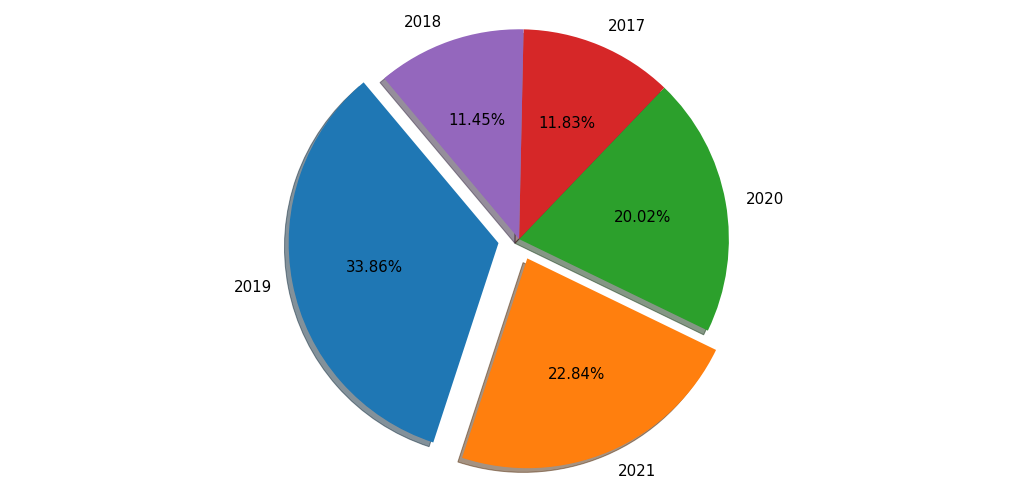

In [35]:
explode = [0.1,0.1,0,0,0]
textprops = {"fontsize":15}
plt.rcParams['figure.figsize'] = (18,9)
plt.pie(year_value_top, labels = year_index_top, shadow = True, autopct='%1.2f%%', startangle=130
        ,labeldistance=1.1,explode = explode,textprops = textprops)
plt.axis('equal')
plt.show()

# Conclusion 
# Top 5 model with repeact of there year as per the data 

## 1. As per the data the most model in our dataset is of 2019 year model whic
## 2. As per data 2021 is on 2nd number with the percentage of 22.84
## 3. On 3rd number we have 2020 model car with 20.2%

In [36]:
model_index = year_df['used/certified'].value_counts().index[:3]
model_value = year_df['used/certified'].value_counts().values[:3]

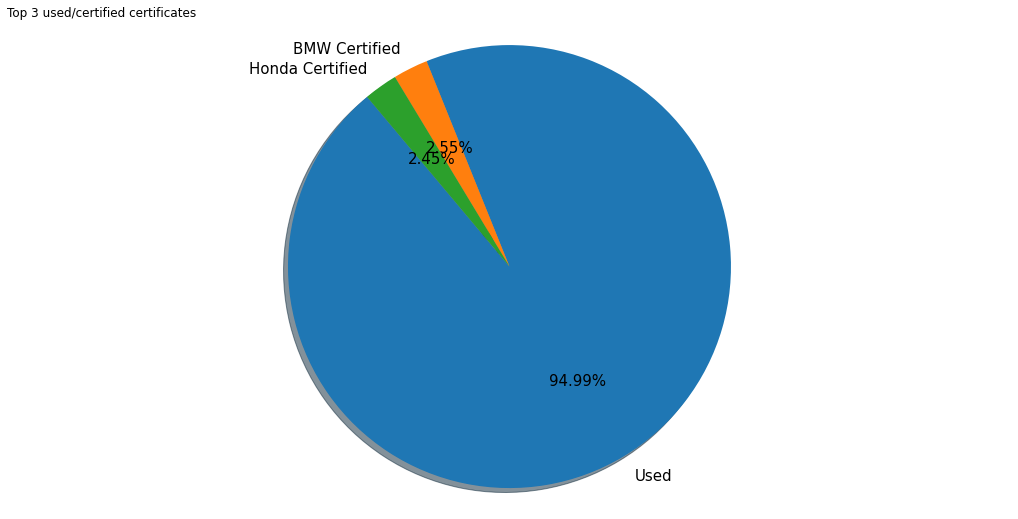

In [37]:
textprops = {"fontsize":15}
plt.rcParams['figure.figsize'] = (18,9)
plt.pie(model_value, labels = model_index, shadow = True, autopct='%1.2f%%', startangle=130
        ,labeldistance=1.1,textprops = textprops)
plt.axis('equal')
plt.title('Top 3 used/certified certificates', loc = 'left')
plt.show() 

# Conclusion 
# Top 3  used/certified data 

## As per the data we have 94.99% used certified car 
## And on 2 and 3 position we have  BMW certified and Honda certified with repect of 2.55% and 2.45%

  


## Now we will remove the used certified car data and look and the other certified cars

In [38]:
other_certified = year_df[year_df != 'Used']

In [39]:
other_certified_index = other_certified['used/certified'].value_counts().index[:10]
other_certified_value = other_certified['used/certified'].value_counts().values[:10]

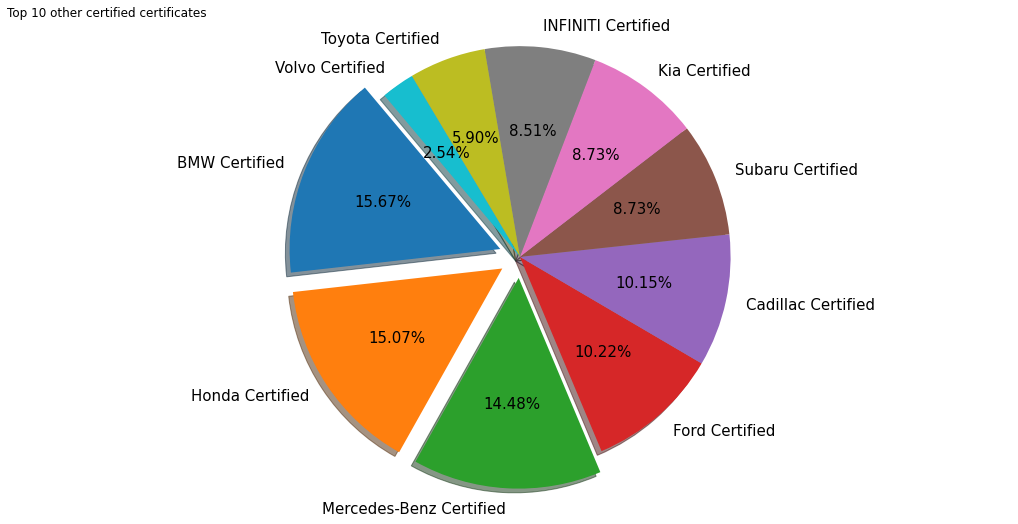

In [40]:
explode = [0.1,0.1,0.1,0,0,0,0,0,0,0]
textprops = {"fontsize":15}
plt.rcParams['figure.figsize'] = (18,9)
plt.pie(other_certified_value, labels = other_certified_index, shadow = True, autopct='%1.2f%%', startangle=130
        ,labeldistance=1.1,textprops = textprops,explode = explode)
plt.title('Top 10 other certified certificates', loc = 'left')
plt.axis('equal')
plt.show()

# Conclusion 
# Top 10 other certified cars are 
## BMW with 23.89% and Honda 15.7% and Mercedes-Benz with 14.48% with respect to 1st,2nd,3rd position  
## On 4th position we have Ford with 10.22%
## On 5th position we have Cadillac with 10.15%
## Sabaru and Kia are at same position with 8.73%
## Infinite,Tokyo and Volvo is on 8th ,9th and 10th position with 8.51%,5.90%, and 2.54%  


# Now we will try to know rating on the bases of  certificate

Text(0.5, 1.0, 'Used certified rating')

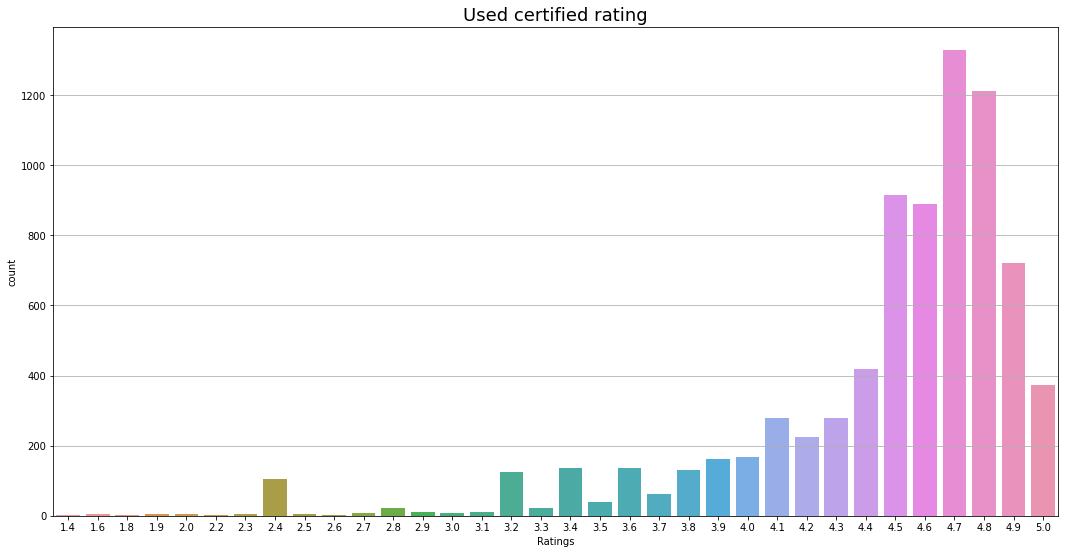

In [53]:
used_rating = df[['Ratings','used/certified']].loc[(df['used/certified'] == 'Used')]
plt.grid()
ax = sns.countplot(x = 'Ratings', data = used_rating)
ax.set_title('Used certified rating', fontsize=18, color='black')

# Observation
# Top 3 Rating on used certificate 

## The most rating of used certificate is 4.7
## On the second positon we have 4.8 rating 
## On the Third position we have 4.5

Text(0.5, 1.0, 'Honda certified rating')

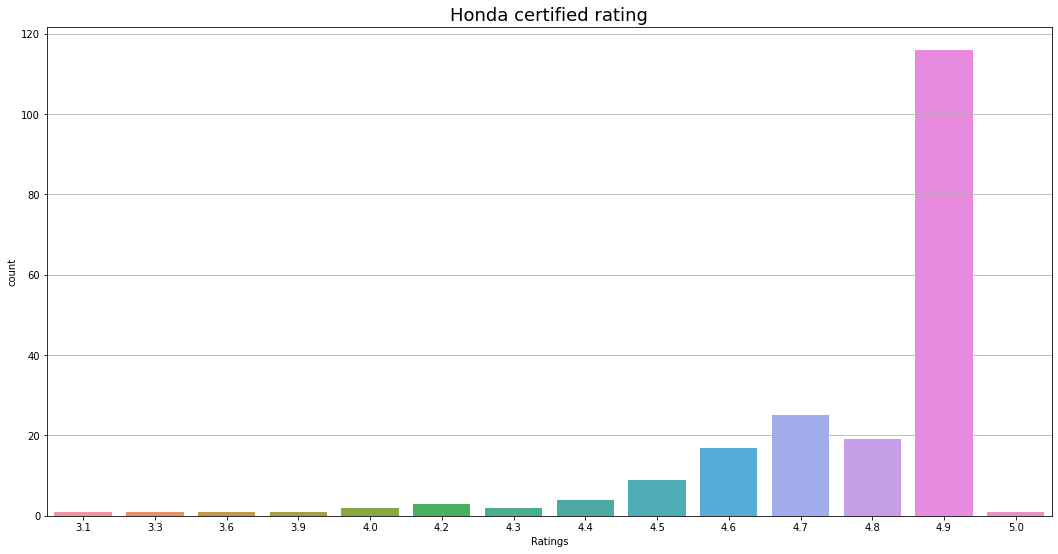

In [51]:
Honda_certified = df[['Ratings','used/certified']].loc[(df['used/certified'] == 'Honda Certified')]
plt.grid()
ax = sns.countplot(x = 'Ratings', data = Honda_certified)
ax.set_title('Honda certified rating', fontsize=18, color='black')

# Observation 
# Top 3 Rating on Honda Certificate 
## 4.9 Rating is most rated points in Honda Certificate 
## ON the second and third postion we have 4.7 and 4.8

Text(0.5, 1.0, 'BMW certified rating')

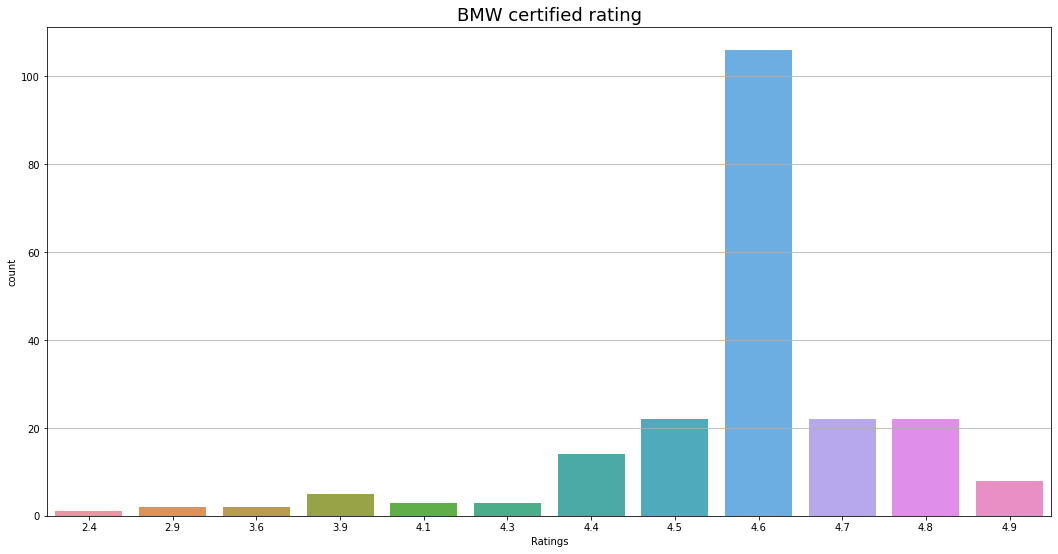

In [54]:
BMW_rating = df[['Ratings','used/certified']].loc[(df['used/certified'] == 'BMW Certified')]
plt.grid()
ax = sns.countplot(x = 'Ratings', data = BMW_rating)
ax.set_title('BMW certified rating', fontsize=18, color='black')

# Observation 
# Top 3 Rating on BMW Certificate
## On First position we have 4.6 rating 
## on Second postion we have 4.5, 4.7, 4.8
## on Third postion we have 4.4 rating 

Text(0.5, 1.0, 'Mercedes certified rating')

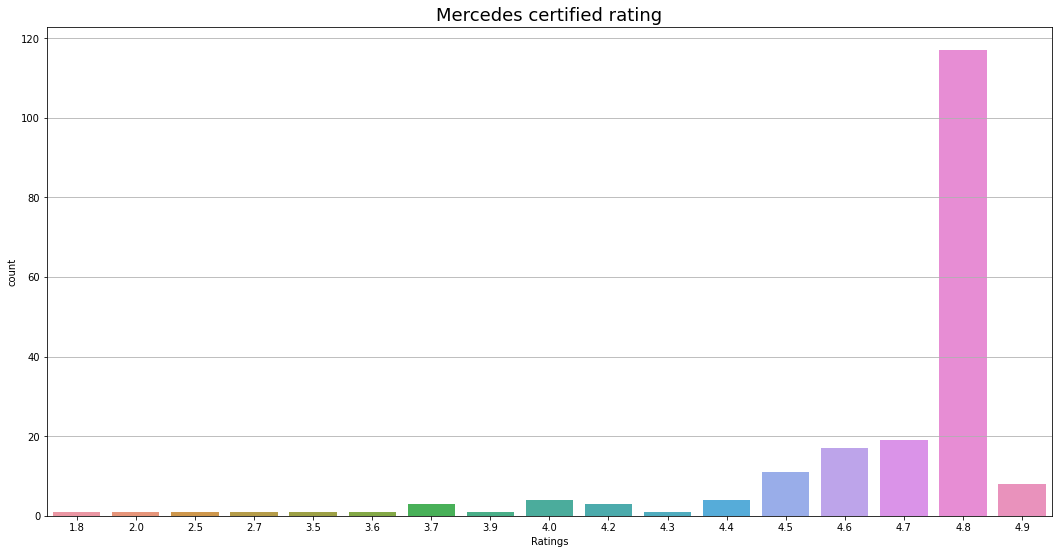

In [55]:
Mercedes_rating = df[['Ratings','used/certified']].loc[(df['used/certified'] == 'Mercedes-Benz Certified')]
plt.grid()
ax = sns.countplot(x = 'Ratings', data = Mercedes_rating)
ax.set_title('Mercedes certified rating', fontsize=18, color='black')

# Observation 
# Top 3 Rating on Mercedies Certificate
## On First position we have 4.8 rating 
## on Second postion we have 4.7
## on Third postion we have 4.6 rating

Text(0.5, 1.0, 'Ford certified rating')

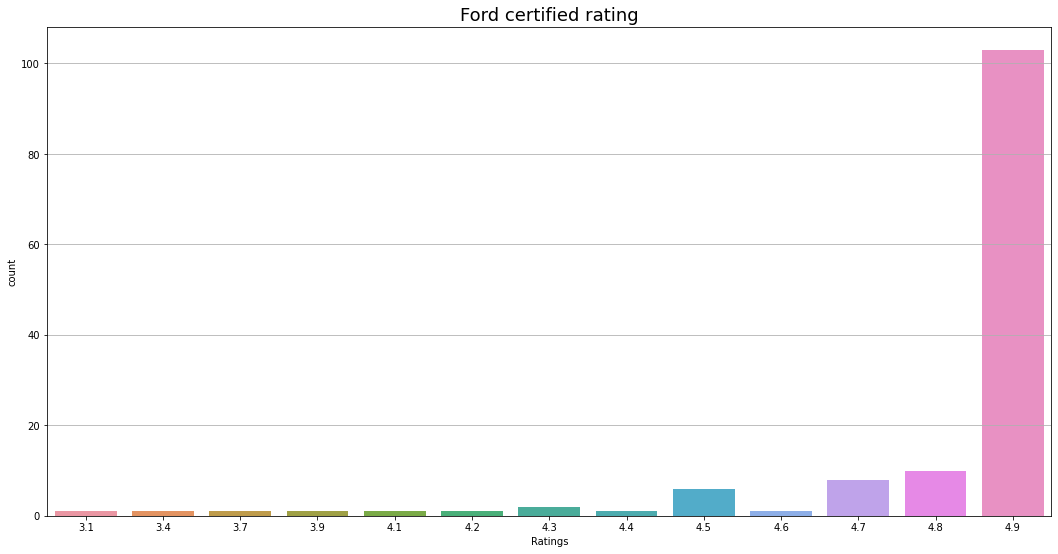

In [56]:
Ford_rating = df[['Ratings','used/certified']].loc[(df['used/certified'] == 'Ford Certified')]
plt.grid()
ax = sns.countplot(x = 'Ratings', data = Ford_rating)
ax.set_title('Ford certified rating', fontsize=18, color='black')

# Observation 
# Top 3 Rating on Ford Certificate
## On First position we have 4.9 rating which has more than 100 count  
## On Second position we have 4.8 rating 
## On Third position we have 4.7 rating 